In [2]:
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip

--2020-06-04 16:09:08--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276294756 (263M) [application/zip]
Saving to: ‘GTSRB_Final_Training_Images.zip’

GTSRB_Final_Trainin 100%[===================>] 263.50M  17.4MB/s    in 16s     

2020-06-04 16:09:25 (16.0 MB/s) - ‘GTSRB_Final_Training_Images.zip’ saved [276294756/276294756]



In [4]:
!unzip GTSRB_Final_Training_Images.zip -d /content/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/GTSRB/Final_Training/Images/00035/00000_00020.ppm  
  inflating: /content/data/GTSRB/Final_Training/Images/00035/00000_00021.ppm  
  inflating: /content/data/GTSRB/Final_Training/Images/00035/00000_00022.ppm  
  inflating: /content/data/GTSRB/Final_Training/Images/00035/00000_00023.ppm  
  inflating: /content/data/GTSRB/Final_Training/Images/00035/00000_00024.ppm  
  inflating: /content/data/GTSRB/Final_Training/Images/00035/00000_00025.ppm  
  inflating: /content/data/GTSRB/Final_Training/Images/00035/00000_00026.ppm  
  inflating: /content/data/GTSRB/Final_Training/Images/00035/00000_00027.ppm  
  inflating: /content/data/GTSRB/Final_Training/Images/00035/00000_00028.ppm  
  inflating: /content/data/GTSRB/Final_Training/Images/00035/00000_00029.ppm  
  inflating: /content/data/GTSRB/Final_Training/Images/00035/00001_00000.ppm  
  inflating: /content/data/GTSRB/Final_Training/Images/00035/00001_00001.ppm  
 

In [0]:
from skimage import io
import os
import glob

# read image paths into a
root_dir = '/content/data/GTSRB/Final_Training/Images'
all_img_paths = glob.glob(os.path.join(root_dir, '*/*.ppm'))

In [0]:
#perform historgram normalisation
import numpy as np
from skimage import color, exposure, transform

NUM_CLASSES = 43
IMG_SIZE = 48

def preprocess_img(img):
     hsv = color.rgb2hsv(img) #convert from RGB to HSV
     hsv[:, :, 2] = exposure.equalize_hist(hsv[:, :, 2]) # normalise values 
     img = color.hsv2rgb(hsv) #convert back to RGB
     img = transform.resize(img, (IMG_SIZE, IMG_SIZE))
     return img

In [7]:
#prepare the input and output arrays
import tensorflow as tf
from tensorflow import keras
import numpy as np

count = 0
imgs = []
labels = []
for img_path in all_img_paths:
     img = preprocess_img(io.imread(img_path))
     label = img_path.split('/')[-2]
     imgs.append(img)
     labels.append(label)

X = np.array(imgs)
Y = tf.keras.utils.to_categorical(labels, num_classes = NUM_CLASSES)

print("DONE - preparation")

DONE - preparation


In [8]:
print(X.shape)

(39209, 48, 48, 3)


In [10]:
# build the training and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state= 42)

print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("DONE - building training and test datasets")

Shape of X_train: (31367, 48, 48, 3)
DONE - building training and test datasets


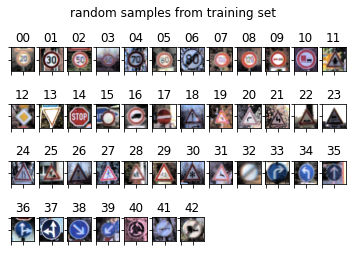

In [11]:
# Show some random samples from the Training Set 
import pylab as plt
n_classes = y_train.shape[1]
img_shape = X_train[0].shape


f, ax_array = plt.subplots(4, 12)
plt.suptitle('random samples from training set')
for cls_id, ax in enumerate(ax_array.ravel()):
    if cls_id < NUM_CLASSES:
        # show random image for current class
        cur_X = X_train[np.where(y_train==1)[1]==cls_id]
        cur_img = cur_X[np.random.randint(len(cur_X))]
        ax.imshow(cur_img)
        ax.set_title('{:02d}'.format(cls_id))
    else:
        ax.axis('off')
# close both x and y ticks
plt.setp([a.get_xticklabels() for a in ax_array.ravel()], visible=False)
plt.setp([a.get_yticklabels() for a in ax_array.ravel()], visible=False)
plt.draw()

In [14]:
'''
labels = ['20 km/h', '30 km/h', '50 km/h', '60 km/h', '70 km/h', '80 km/h', '80 km/h end', '100 km/h', '120 km/h', 'No overtaking',
               'No overtaking for tracks', 'Crossroad with secondary way', 'Main road', 'Give way', 'Stop', 'Road up', 'Road up for track', 'Brock',
               'Other dangerous', 'Turn left', 'Turn right', 'Winding road', 'Hollow road', 'Slippery road', 'Narrowing road', 'Roadwork', 'Traffic light',
               'Pedestrian', 'Children', 'Bike', 'Snow', 'Deer', 'End of the limits', 'Only right', 'Only left', 'Only straight', 'Only straight and right', 
               'Only straight and left', 'Take right', 'Take left', 'Circle crossroad', 'End of overtaking limit', 'End of overtaking limit for track']'''

"\nlabels = ['20 km/h', '30 km/h', '50 km/h', '60 km/h', '70 km/h', '80 km/h', '80 km/h end', '100 km/h', '120 km/h', 'No overtaking',\n               'No overtaking for tracks', 'Crossroad with secondary way', 'Main road', 'Give way', 'Stop', 'Road up', 'Road up for track', 'Brock',\n               'Other dangerous', 'Turn left', 'Turn right', 'Winding road', 'Hollow road', 'Slippery road', 'Narrowing road', 'Roadwork', 'Traffic light',\n               'Pedestrian', 'Children', 'Bike', 'Snow', 'Deer', 'End of the limits', 'Only right', 'Only left', 'Only straight', 'Only straight and right', \n               'Only straight and left', 'Take right', 'Take left', 'Circle crossroad', 'End of overtaking limit', 'End of overtaking limit for track']"

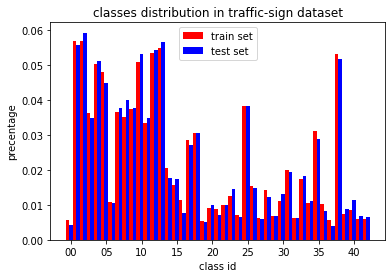

In [15]:
# Show Histogram of classes distribution of train and test sets
train_distribution, test_distribution = np.zeros(n_classes, dtype=np.float), np.zeros(n_classes, dtype=np.float)

for c in range(n_classes):
    train_distribution[c] = np.sum(np.where(y_train)[1]==c, dtype=np.float32) / len(y_train)
    test_distribution[c] = np.sum(np.where(y_test)[1]==c, dtype=np.float32) / len(y_test)

f, ax = plt.subplots()
bar_train = ax.bar(np.arange(n_classes), train_distribution, width=0.5, color='r')
bar_test = ax.bar(np.arange(n_classes)+0.5, test_distribution, width=0.5, color='b')
ax.set_ylabel('precentage')
ax.set_xlabel('class id')
ax.set_title('classes distribution in traffic-sign dataset')
ax.set_xticks(np.arange(0, n_classes, 5)+0.5)
ax.set_xticklabels(['{:02d}'.format(c) for c in range(0, n_classes, 5)])
ax.legend((bar_train[0], bar_test[0]), ('train set', 'test set'))
plt.show()

In [16]:
'''
#############
import numpy as np
n_train = X_train.shape[0]
n_train1 = X_train.shape[1]
n_train2 = X_train.shape[2]
n_train3 = X_train.shape[3]

# TODO: Number of validation example
#n_validation = X_valid.shape[0]

# TODO: Number of testing example.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
#x=set(y_train)
#print(x)
n_classes = len(y_train[0])

print("Number of training examples =", n_train)
print("height =", n_train1)
print("width =", n_train2)
print("channels =",n_train3)
print("\nNumber of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

######
'''

Number of training examples = 31367
height = 48
width = 48
channels = 3

Number of testing examples = 7842
Image data shape = (48, 48, 3)
Number of classes = 43


In [0]:
'''
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
'''

X_train shape: (31367, 48, 48, 3)
y_train shape: (31367, 43)
X_test shape: (7842, 48, 48, 3)
y_test shape: (7842, 43)


In [0]:
'''
print("Number of training examples =", len(X_train))
print("Number of testing examples =", len(X_test))
print("Image data shape =", X_train[0].shape)
print("Number of classes =", len(y_train[1]))
'''

Number of training examples = 31367
Number of testing examples = 7842
Image data shape = (48, 48, 3)
Number of classes = 43


In [17]:
#Build and compile the model

from keras import Sequential, layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_SIZE, IMG_SIZE, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)       

In [18]:
# FIT model
history = model.fit(X_train, y_train,batch_size=32,epochs=5,validation_data = (X_test, y_test), use_multiprocessing=True)

Train on 31367 samples, validate on 7842 samples
Epoch 1/5
31367/31367 [==============================] - 22s 688us/step - loss: 1.2353 - acc: 0.6463 - val_loss: 0.1494 - val_acc: 0.9573
Epoch 2/5
31367/31367 [==============================] - 15s 471us/step - loss: 0.1798 - acc: 0.9426 - val_loss: 0.0787 - val_acc: 0.9762
Epoch 3/5
31367/31367 [==============================] - 14s 462us/step - loss: 0.1096 - acc: 0.9658 - val_loss: 0.0395 - val_acc: 0.9887
Epoch 4/5
31367/31367 [==============================] - 15s 464us/step - loss: 0.0889 - acc: 0.9739 - val_loss: 0.0406 - val_acc: 0.9880
Epoch 5/5
31367/31367 [==============================] - 15s 466us/step - loss: 0.0734 - acc: 0.9785 - val_loss: 0.0289 - val_acc: 0.9913


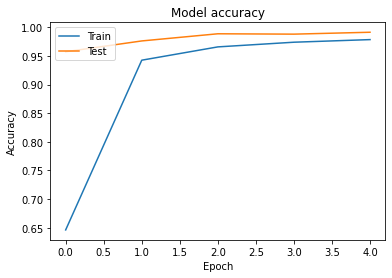

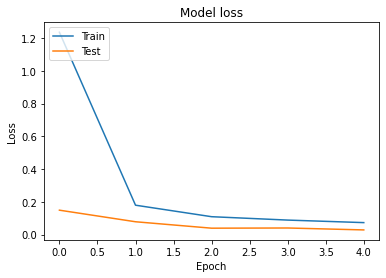

In [19]:
#plot performance
import pylab as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
#Evaluate Model
model.evaluate(X_test, y_test, batch_size=8)

7842/7842 [==============================] - 5s 596us/step


[0.028901200772068928, 0.9913287162780762]

In [0]:
#Model Save
model.save_weights('./TSC_1.h5', overwrite=True)

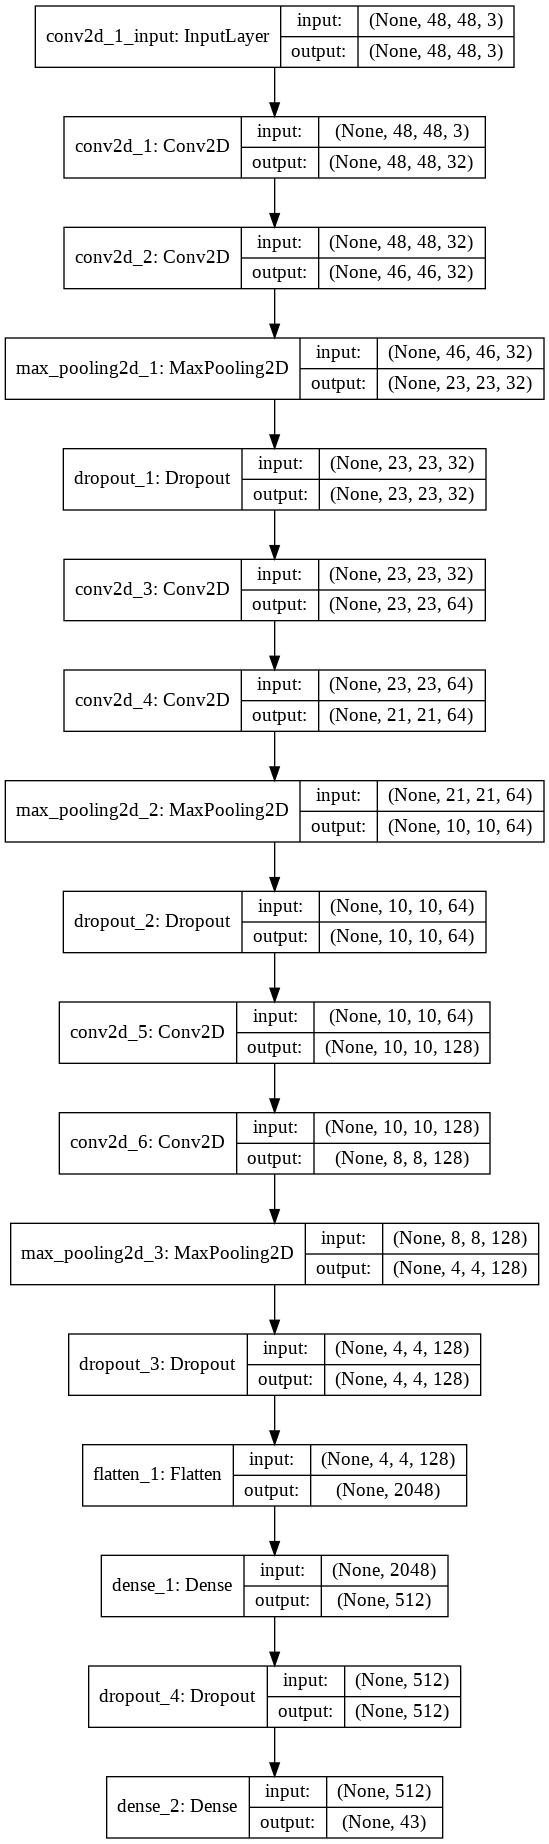

In [26]:
#Visualise Model Topology and save to file (model.png)
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='TSC_1.png')

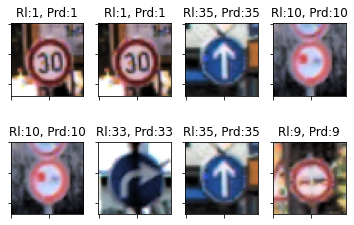

In [27]:
#Check Prediction
import random
x, y = X_test[:8], y_test[:8]
f, ax_array = plt.subplots(2, 4)

for ax in ax_array.ravel():
    rid = random.randint(0, y.shape[0]-1)
    pcls = model.predict(x[rid:rid+1])
    ax.imshow(X_test[rid])
    ax.set_title('Rl:{}, Prd:{}'.format(np.argmax(y[rid], axis=0), np.argmax(pcls, axis=1)[0]))

plt.setp([ax.get_xticklabels() for ax in ax_array.ravel()], visible=False)
plt.setp([ax.get_yticklabels() for ax in ax_array.ravel()], visible=False)
plt.savefig('/content/result.jpg')
plt.show()

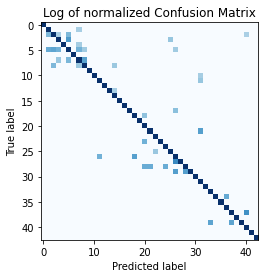

In [28]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
num_examples = len(X_test)
#y_pred = np.zeros(num_examples, dtype=np.int32)
y_pred=model.predict(X_test)

cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm = np.log(.0001 + cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Log of normalized Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()